# iGED : Global Systems Dynamics Initiative

El objetivo principal de este documento es analizar las métricas globales en las siguientes redes capitales

  *  Ciudad Autónoma de Buenos Aires (CABA)
  *  Ciudad de México (CDMX)
  *  Santiago de Chile (SCL)
  *  Montevideo (MTV)
  *  Madrid (MAD)
  *  Sao Paulo (SAO)

y obtener un tidy DataFrame, para continuar analizando los datos obtenidos, por ejemplo obteniendo correlaciones entre parejas de métricas.

Respecto al notebook anterior, utilizamos la documentación de NetworkX: https://www.nas.ewi.tudelft.nl/people/Piet/papers/TUDreport20111111_MetricList.pdf

así como el siguiente recurso: https://www.nas.ewi.tudelft.nl/people/Piet/papers/TUDreport20111111_MetricList.pdf

para saber con cuáles métricas globales seguir estudiando nuestros ecosistemas.

In [1]:
#-------------------------------------------------------
# Importar paquetes a utilizar
#-------------------------------------------------------
import pandas as pd
import numpy as np 
import networkx as nx
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

G={}

for i in range(60):
    G[i]=nx.read_graphml('Random_Graphs/Random_Graph_'+str(i+1)+'.graphml')


In [2]:
#--------------------------------
# Central point of Dominance
#--------------------------------


def central_point_dominance(G):
    betwennesses = nx.betweenness_centrality(G)
    b_max = max(betwennesses.values())
    N = len(betwennesses.keys())
    count = 0
    for i, b_i in betwennesses.items():
        count += ( b_max - b_i )/(N-1)
    return count

In [3]:
#--------------------------------
# Spectral Radius
#--------------------------------
#     the smaller the spectral radius rho, the higher the probability of 'virus infection' tau, 
#     the more difficult it is for an idea to spread in the innovative network, 
#     namely, the less efficient

import numpy.linalg

def spectral_radius(G):
    L = nx.normalized_laplacian_matrix(G)
    e = numpy.linalg.eigvals(L.A)
    e_abs = [abs(x) for x in e]
    return max(e_abs)

In [4]:
def core_ratio(G):
    return len(nx.k_core(G,k=2).nodes())/len(G.nodes())

In [5]:
def rich_club_coeffs(G):
    t_ok = True
    t = 0
    d = dict()
    while t_ok:
        nodes_large_degree=[]
        for x in G.nodes():
            if G.degree(x)>t:
                nodes_large_degree.append(x)
        core = G.subgraph(nodes_large_degree)
        edges_core = len(core.edges())
        nodes_core = len(core.nodes())
        if nodes_core<=1:
            t_ok = False
            break
        d[t] = (2*edges_core)/(nodes_core*(nodes_core-1))
        t += 1 
    return d        

def max_rich_club(G):
    #rich_club_1=nx.algorithms.rich_club_coefficient(G, normalized=False)
    rich_club=rich_club_coeffs(G)
    max_i=0
    for i in range(len(rich_club)):
        if rich_club[i]>rich_club[max_i]:
            max_i=i
        else:
            return rich_club[max_i]

## Creacion del Dataframe

El siguiente bloque crea todas las metricas de la grafica que usaremos para estudiarlas.

In [6]:
n=len(G)

degree = n*[0]
diameter = n*[0]
radius = n*[0]
avg_shortest_path_length = n*[0]
transitivity = n*[0]
global_efficiency = n*[0]
modularity = n*[0]
rich_club_coefficient = n*[0]
core_rate= n*[0]
central_pt = n*[0]
spectral_radii = n*[0]
modularidad=n*[0]

for index in G.keys():
    graph=G[index]
    
    #conseguimos cada parámetro para esta ciudad
    diameter[index] =                     nx.diameter(graph)
    radius[index] =                       nx.radius(graph)
    avg_shortest_path_length[index] =     nx.average_shortest_path_length(graph)
    transitivity[index] =                 nx.transitivity(graph)
    global_efficiency[index] =            nx.global_efficiency(graph)
    #modularidad precomputada
    rich_club_coefficient[index] =        max_rich_club(graph)  
    core_rate[index]=                     core_ratio(graph)
    central_pt[index]=       central_point_dominance(graph)
    spectral_radii[index]=               spectral_radius(graph)
    modularidad[index]=                  nx.algorithms.community.quality.performance(graph,nx.algorithms.community.modularity_max.greedy_modularity_communities(graph))

df=pd.DataFrame()


df['Eficiencia Global'] = global_efficiency
df['Transitividad'] = transitivity
df['Modularidad'] = modularidad
df['Radio'] = radius
df['Rich Club Coefficient'] = rich_club_coefficient
df['Core Ratio'] = core_rate
df['Central Point Dominance'] = [round(central_pt[index],3) for index in range(n)]
df['Spectral radius'] = [round(spectral_radii[index],3) for index in range(n)]
df['Camino más corto promedio'] = avg_shortest_path_length
df['Diámetro'] = diameter


df

,Eficiencia Global,Transitividad,Modularidad,Radio,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius,Camino más corto promedio,Diámetro
0,0.342953,0.057235,0.880214,4,0.025378,0.741758,0.117,1.818,3.227126,5
1,0.374024,0.097466,0.870010,3,0.036981,0.702128,0.144,1.785,2.972036,5
2,0.349931,0.074597,0.895751,3,0.027271,0.634731,0.103,1.818,3.183248,5
3,0.358951,0.087683,0.896654,3,0.032415,0.723684,0.119,1.789,3.110753,5
4,0.343725,0.100840,0.889586,3,0.024983,0.597765,0.130,1.796,3.223024,5
5,0.523965,0.168224,0.738562,2,0.156863,0.444444,0.647,1.843,2.169935,3
6,0.329053,0.071940,0.899981,3,0.019537,0.593074,0.119,1.806,3.350386,6
7,0.353618,0.099850,0.858824,3,0.029377,0.682353,0.142,1.794,3.150365,6
8,0.347859,0.086497,0.898352,4,0.029022,0.721893,0.158,1.864,3.214849,6
9,0.345227,0.076463,0.901171,3,0.024552,0.685279,0.113,1.816,3.198695,5


## Colaboracion

Empezamos analizando las metricas que ya hemos calculado y luego usaremos esta informacion para crear una medida de la colaboracion.

In [7]:
#---------------------------------------------
#Preparar escalas y herramientas para el analisis.
#---------------------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X=df.to_numpy()



#normalized= StandardScaler().fit_transform(X)
pca=PCA(n_components=5)
prin_comp=pca.fit_transform(X)

pca.components_

array([[ 2.23940252e-02,  1.25912046e-02, -1.44222240e-02,
        -6.13165225e-01,  1.40918328e-02, -3.74787795e-02,
         5.14193240e-02, -6.13925051e-03, -1.50902318e-01,
        -7.72077710e-01],
       [ 3.84826663e-03, -6.97817825e-03, -5.38632460e-03,
         7.83672548e-01,  5.32340756e-03,  1.96006854e-02,
         2.08223699e-02, -4.34890629e-04, -6.95955145e-03,
        -6.20378997e-01],
       [ 1.41681268e-01,  5.96414923e-02, -1.19025142e-01,
         8.91220203e-02,  9.30901264e-02,  2.69565836e-03,
         3.54232647e-01,  2.76576705e-03, -8.95225513e-01,
         1.36636071e-01],
       [ 2.57843756e-02,  8.99446877e-02, -6.73104453e-02,
         1.69181356e-02,  6.92155536e-02, -7.38833342e-01,
         5.35336886e-01,  3.01932325e-01,  2.40487168e-01,
         1.34131306e-02],
       [ 5.22074053e-03, -1.07766307e-01,  1.42840433e-01,
        -3.77060309e-02,  2.81505889e-02,  6.39325138e-01,
         6.04203255e-01,  3.81864193e-01,  2.14549106e-01,
        -9.

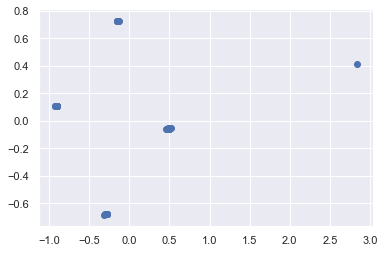

In [8]:
from matplotlib import pyplot as plt
plt.scatter(prin_comp[:,0], prin_comp[:,1],color='b')

In [23]:
#---------------------------------------
# Fórmula para colaboratividad
#---------------------------------------

eg = df['Eficiencia Global'].tolist()
tr = df['Transitividad'].tolist()
comunicacion = [eg[x]+tr[x] for x in range(n)]

r= df['Radio'].tolist()
sr= df['Spectral radius'].tolist()
size=[-r[x]/14+sr[x]/2.5 for x in range(n)]

rcc = df['Rich Club Coefficient'].tolist()
cr = df['Core Ratio'].tolist()
preparacion = [(rcc[x]+cr[x])/2 for x in range(n)]

colab_1 = [comunicacion[x]+preparacion[x]+size[x] for x in range(n)]
max_colab_1=[]
for i in range(len(colab_1)):
    if colab_1[i]>1.29:
        print(colab_1[i],i)
        max_colab_1.append(i)

1.3407589367187747 1
1.3259973645938055 3
1.5871858925917206 5
1.3126466741417033 7
1.3376499466164873 11
1.323700050896012 12
1.3085122494564108 20
1.31087912452259 25
1.3015178368198703 29
1.3091809094883944 35
1.2945363082447126 39
1.3045716635970546 43
1.2929305671828444 48
1.3089913524919563 49
1.3079595145624197 52


In [24]:
eg = df['Eficiencia Global'].tolist()
comunicacion = [eg[x] for x in range(n)]

r= df['Transitividad'].tolist()
size=[r[x] for x in range(n)]

rcc = df['Core Ratio'].tolist()
md= df['Modularidad'].tolist()
preparacion = [-rcc[x]/2-md[x]/2 for x in range(n)]

colab_2 = [comunicacion[x]+preparacion[x]+size[x] for x in range(n)]
max_colab_2=[]
for i in range(len(colab_1)):
    if colab_2[i]>-.33:
        print(colab_2[i],i)
        max_colab_2.append(i)

-0.3145784492994625 1
-0.2991104934849085 4
0.10068617270376543 5
-0.31712079639680796 7
-0.30424160293479235 13
-0.3151268579740011 20
-0.3286701944511194 25
-0.25091086281653435 36
-0.2839501873734903 39
-0.29958451570751177 43
-0.2854373349419377 49
-0.3145548418322289 51
-0.3295203291710825 52
-0.3243177035693492 53
-0.30127445515717083 55
-0.3285071560200361 57


In [15]:
df.loc[max_colab]

,Eficiencia Global,Transitividad,Modularidad,Radio,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius,Camino más corto promedio,Diámetro
